In [791]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [792]:
### Load Dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [793]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [794]:
# Funtion to concat train and test 

def concat_df(train,test):
    df1 = train.copy()
    df2 = test.copy()
    df1['group'] = 'train'
    df2['group'] = 'test'
    return pd.concat([df1,df2],axis=0,ignore_index=True)

In [795]:
data=concat_df(train,test)

In [796]:
data.shape

(2919, 82)

In [797]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [798]:
# Drop Id column as it is not significant
data.drop(['Id'],axis=1,inplace=True)

In [799]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [800]:
# Missing Values
train.isnull().sum()/len(train)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

- There are lot of missing values and the target variable is not having missing values in train dataset.
- As test data doesn't contain target variable, the combined dataframe considers null values to the target variable for test data. Hence, let's handle missing values without affecting target variable.

In [801]:
# Create a copy of all data dataframe
temp = data.copy()
temp.drop(['group','SalePrice'],axis=True,inplace=True)
check=temp.isnull().sum()/len(temp)

### Handling Null Values

In [802]:
### Fetch and drop the columns having null values greater than 25%
cols=list(check[check > 0.25].index)
data=data.drop(cols,axis=1)

In [803]:
data.shape

(2919, 76)

- Four columns are dropped which have null values greater than 25%.

In [804]:
# Splitting Numerical and Categorical Variables

numerical=data.select_dtypes(exclude='object').columns
numerical=numerical.drop(['SalePrice'])
categorical= data.select_dtypes(include='object').columns
categorical=categorical.drop(['group'])

In [805]:
# Handling missing values with median for numerical variables and mode for categorical variables
from sklearn.impute import SimpleImputer

si_num = SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical]=si_num.fit_transform(data[numerical])

si_cat = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data[categorical]=si_cat.fit_transform(data[categorical])

In [806]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
2914,160.0,RM,21.0,1936.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4.0,7.0,1970.0,1970.0,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,TA,5.0,Typ,0.0,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,NaN,test
2915,160.0,RM,21.0,1894.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4.0,5.0,1970.0,1970.0,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,TA,6.0,Typ,0.0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Abnorml,NaN,test
2916,20.0,RL,160.0,20000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5.0,7.0,1960.0,1996.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,TA,7.0,Typ,1.0,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,WD,Abnorml,NaN,test
2917,85.0,RL,62.0,10441.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5.0,5.0,1992.0,1992.0,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970.0,0.0,0.0,970.0,0.0,1.0,1.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,NaN,test
2918,60.0,RL,74.0,9627.0,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7.0,5.0,1993.0,1994.0,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996.0,1004.0,0.0,2000.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,9.0,Typ,1.0,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190.0,48.0,0.0,0.0,0.0,0.0,0.0,11.0,2006.0,WD,Normal,NaN,test


### Exploratory Data Analysis

#### Univariate Analysis

Let's look at the data distribution using Univariate Analysis. What we might look in for histograms are,

1. Data Distribution (Certain models prefer the data less skewed)
2. Outliers (Low noise helps to better the model performance)
3. Odd patterns in data (Data abnormalities also affect the model performance)

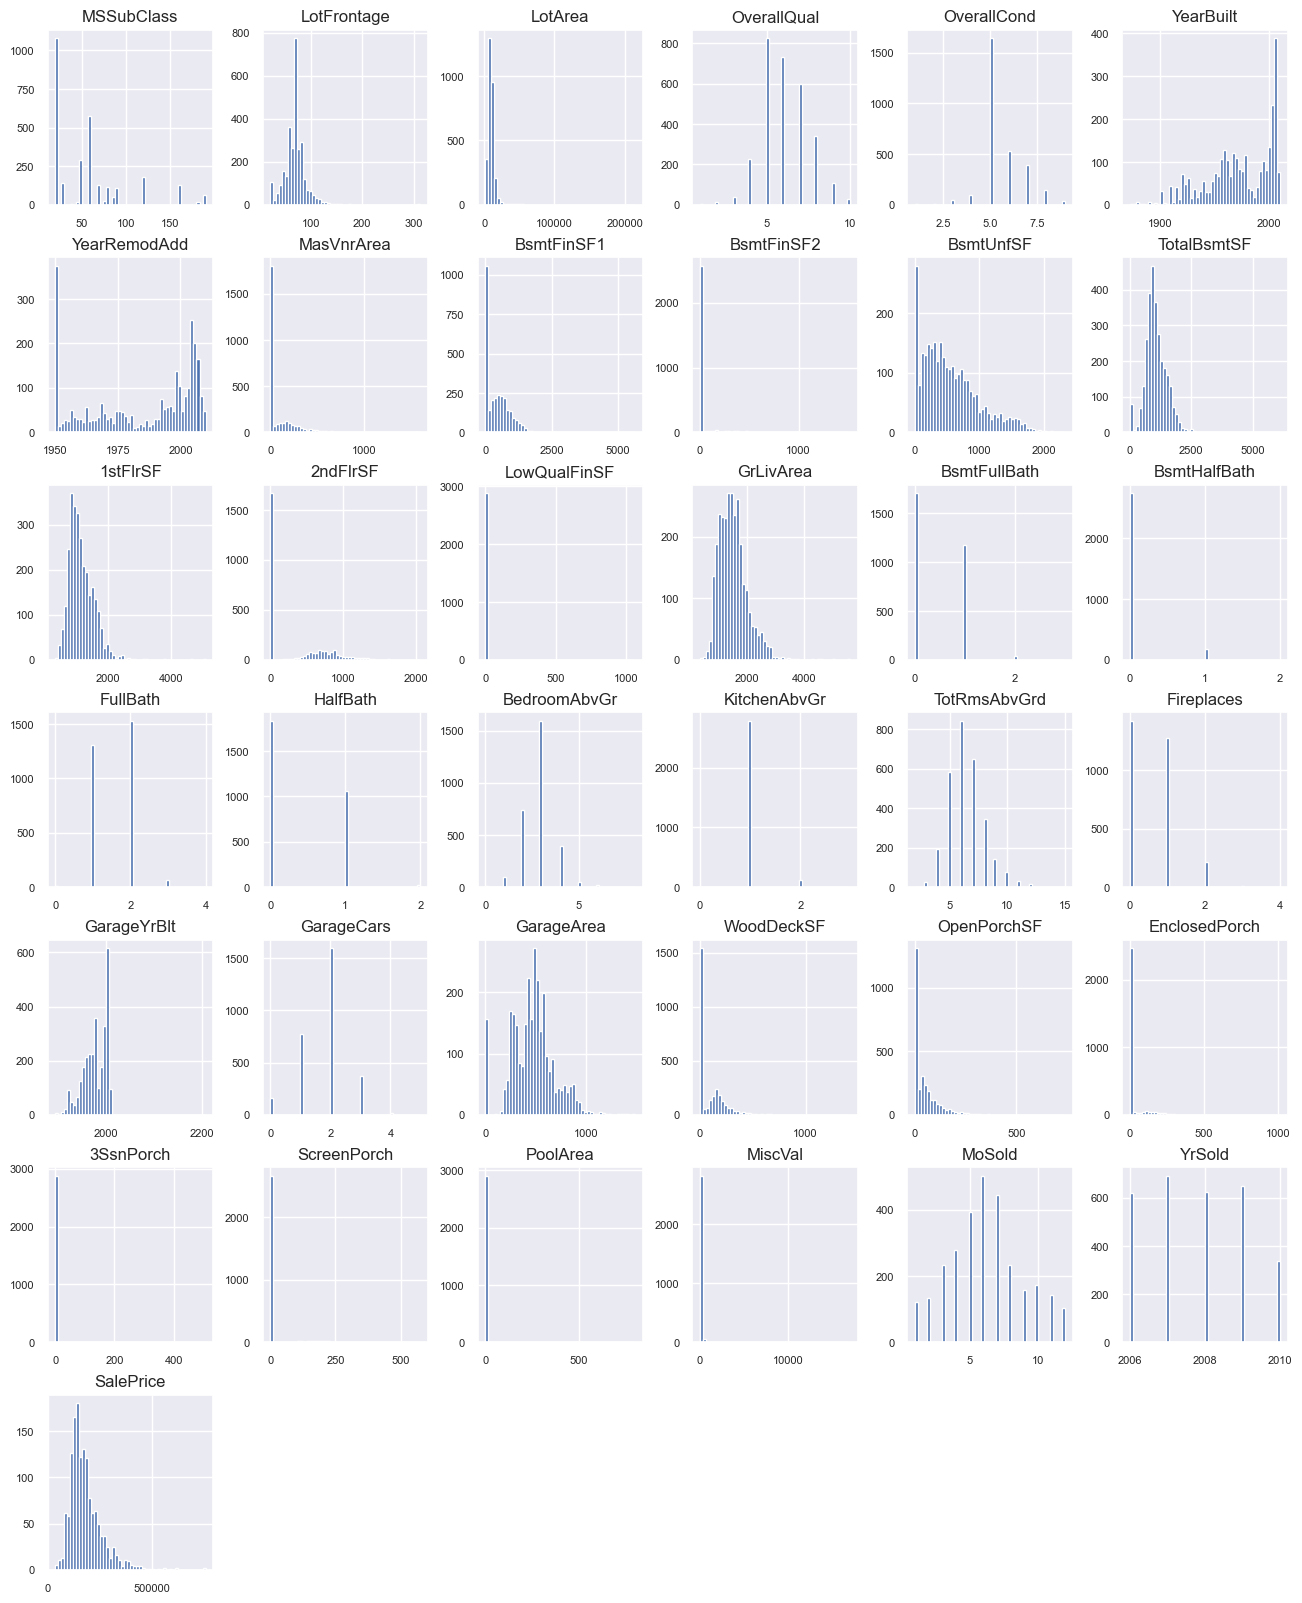

In [807]:
data.hist(bins=50,figsize=(16,20),xlabelsize=8,ylabelsize=8)
plt.show()

## Bivariate Analysis

### Bivariate Correlation Matrix:

1. Bivariate (Two Feature) - Two feature relation - Correlation Measure.
2. It tells about the linear relation between two variables.

#### What we might look for,

1. Often emphasized that, too highly or too lowly correlated variables should be dropped.
2. Any signs of non-linearity in the dataset. i.e not correlated variables.
3. High correlation values between features indicates that features may represent similar things. 

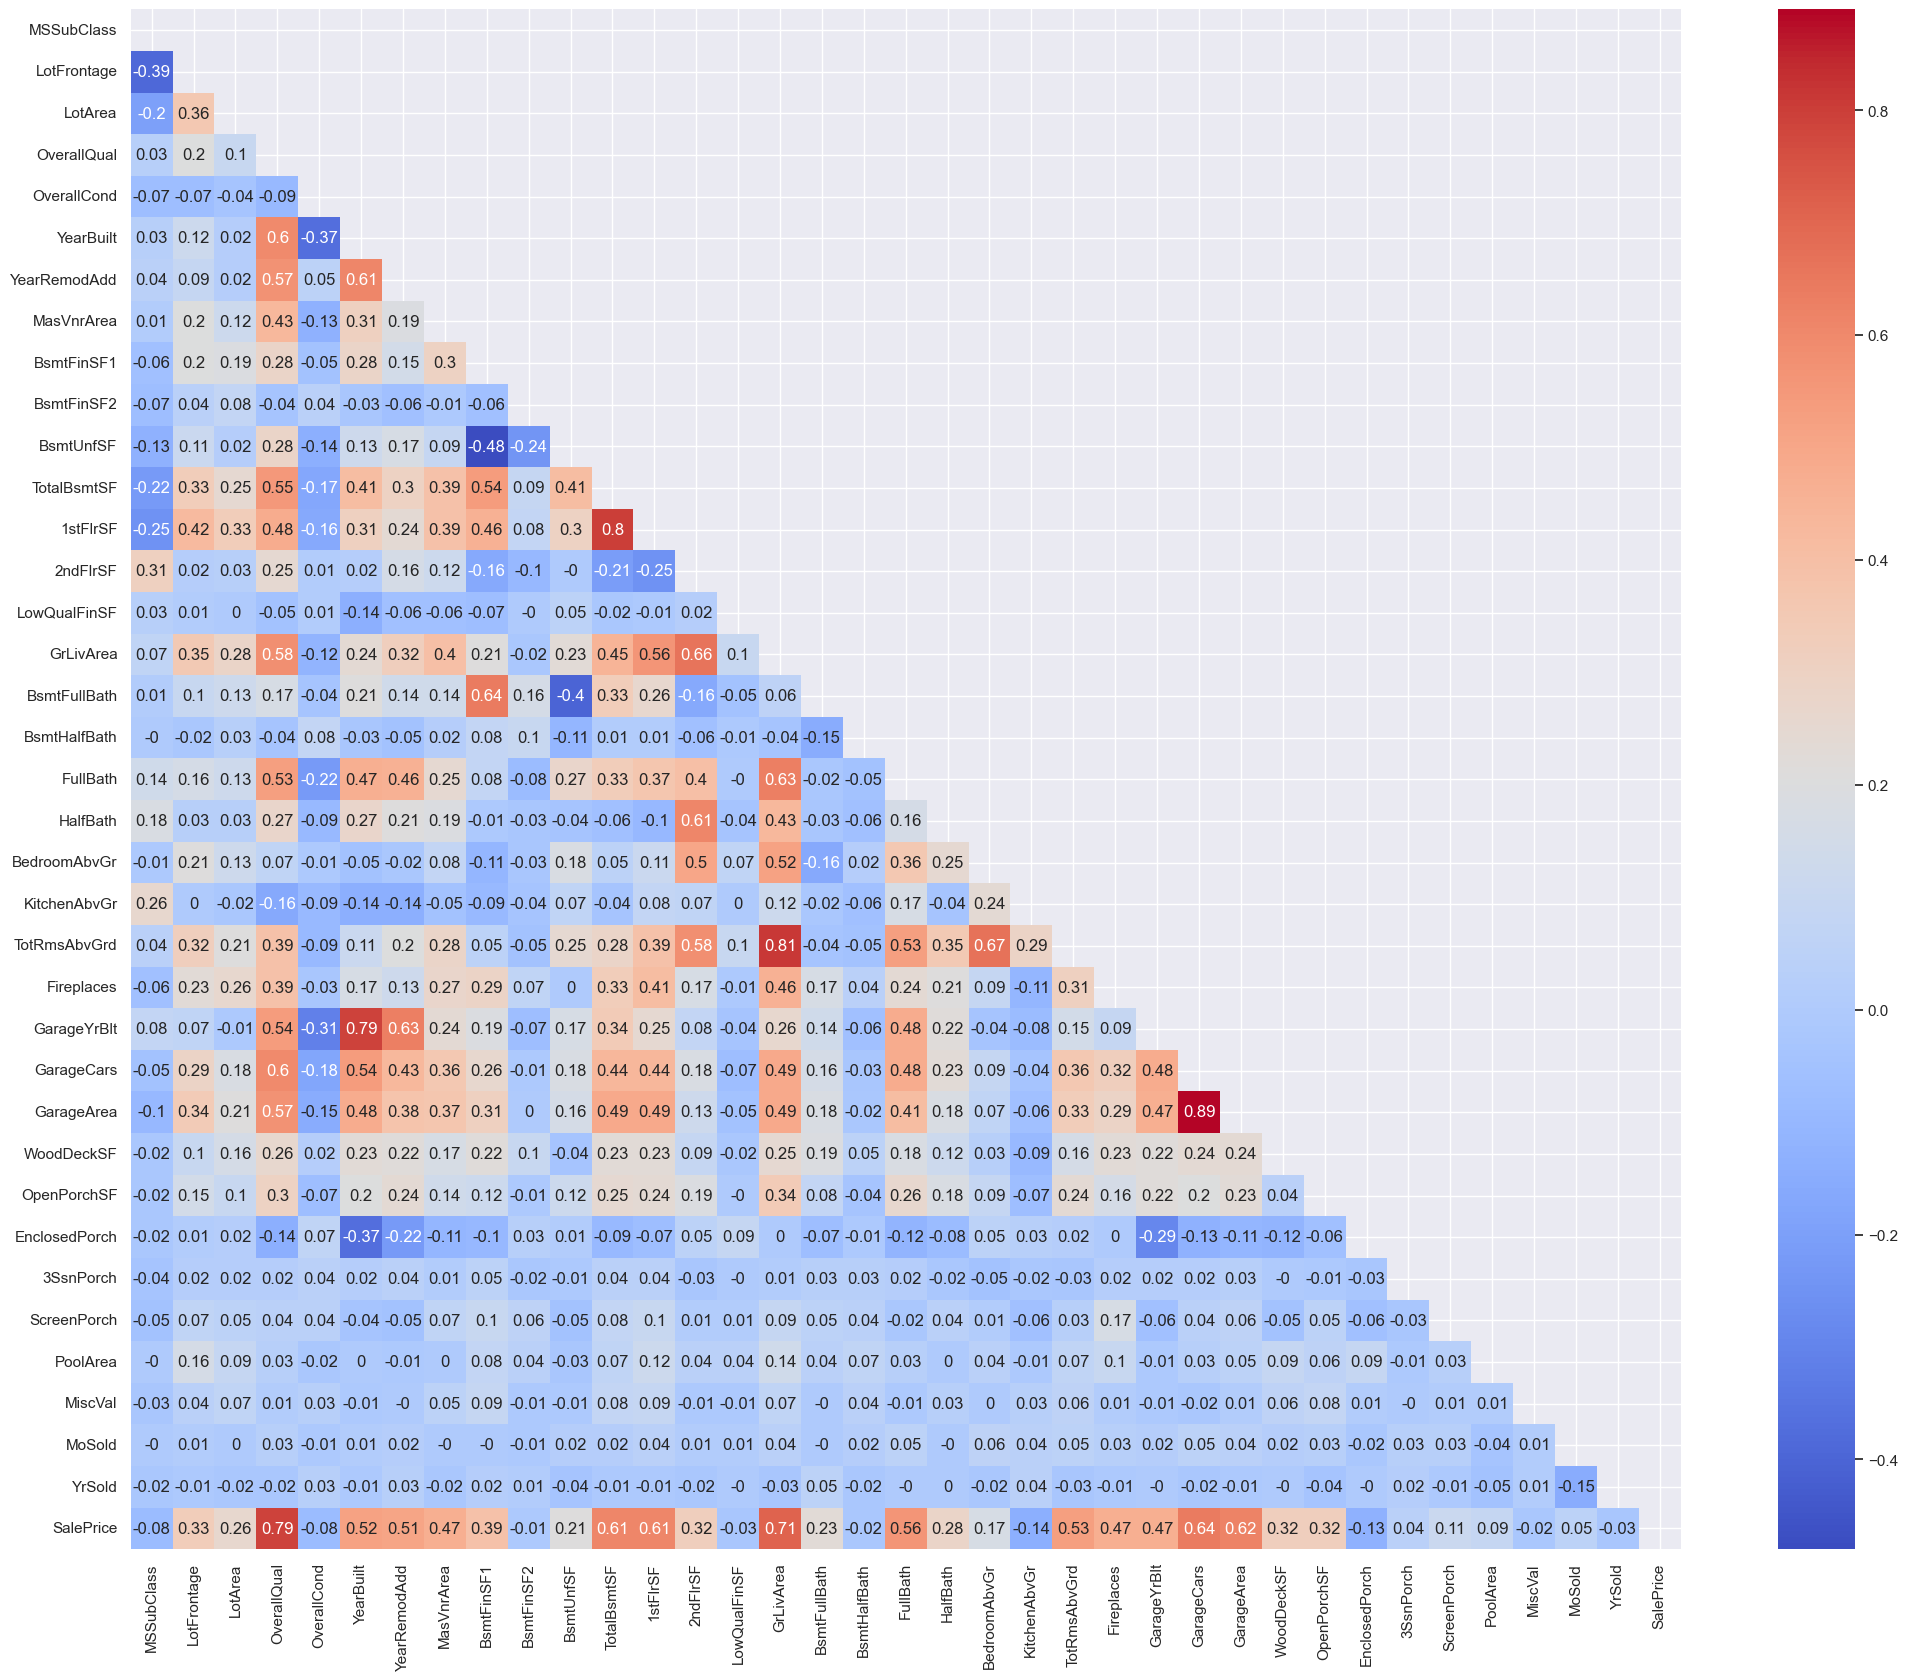

In [808]:
### Plotting correlation of features

corr_mat=data.corr().round(2)
plt.figure(figsize=(25,20))
mask=np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_mat,mask=mask,annot=True,cmap='coolwarm')
plt.show()

1. Target variable (SalePrice) is mildly correlated to all features except OverallCond,GrLivArea variables have good correlation.
2. The features 1stFlrSF,TotalBsmntSF,TotRmsAbvGrd,GrLivArea,GarageYrBlt,YearBuilt, GarageArea,GarageCars have highcorrelation which indicates that these features represent similar things. Hence, we can drop one from two features having high correlation.

In [809]:
data.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1,inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,Typ,0.0,Attchd,2003.0,RFn,2.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,train
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,Typ,1.0,Attchd,1976.0,RFn,2.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,train
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,Typ,1.0,Attchd,2001.0,RFn,2.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,train
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,Typ,1.0,Detchd,1998.0,Unf,3.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0,train
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,Typ,1.0,Attchd,2000.0,RFn,3.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,train


### Box Plot for SalePrice

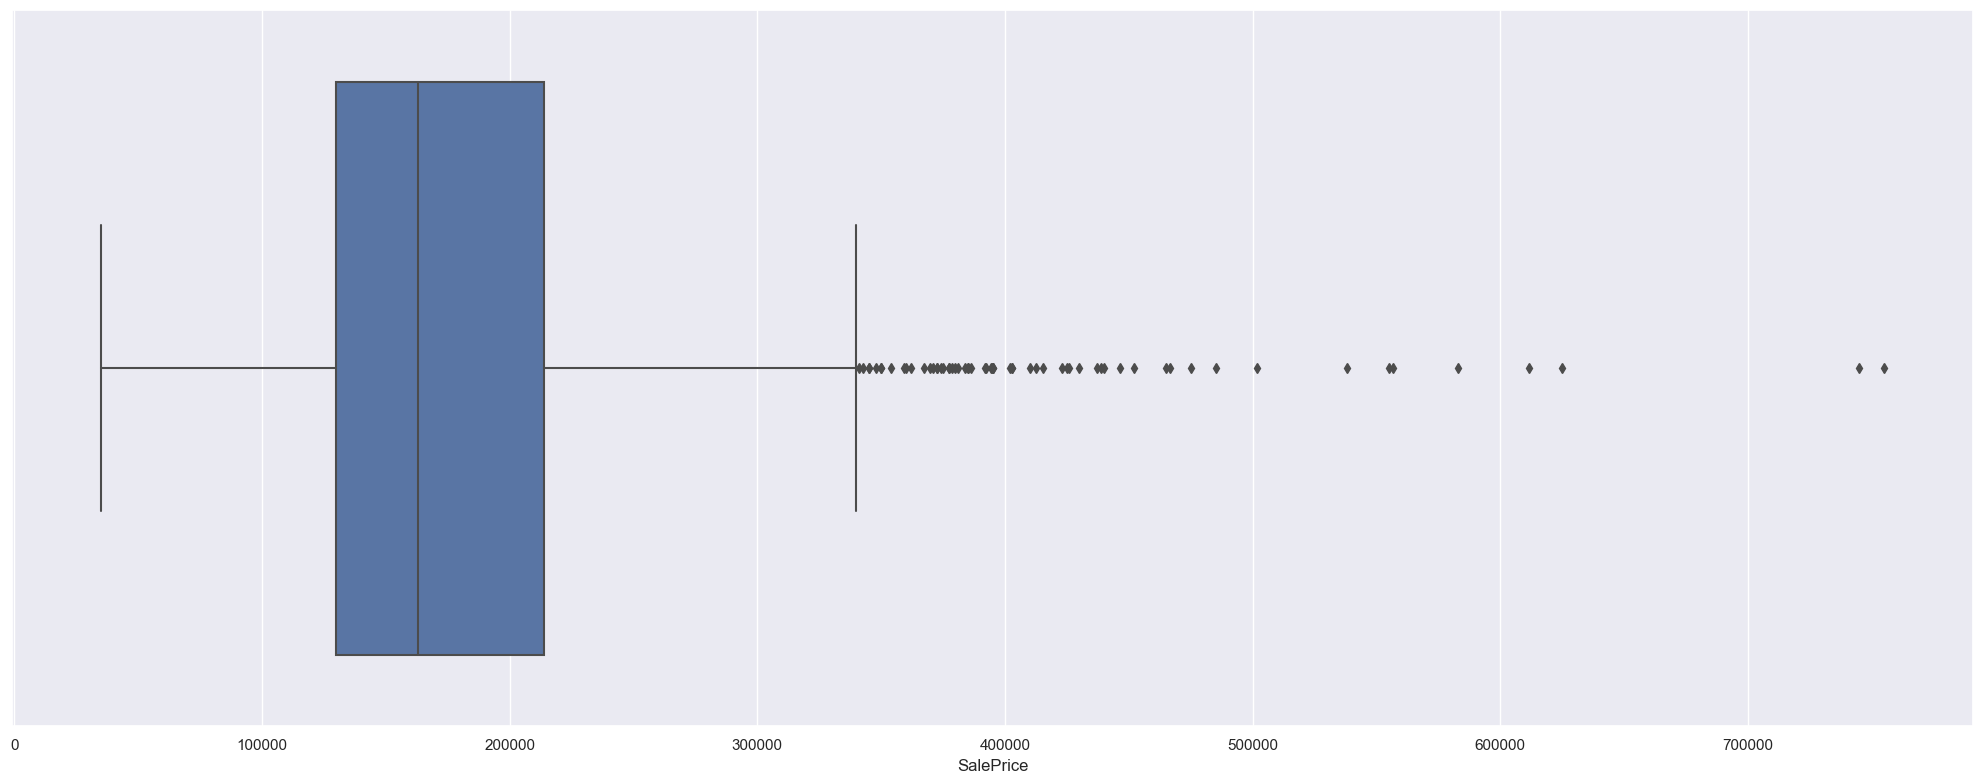

In [810]:
plt.figure(figsize=(20,8))
sns.boxplot(data,x='SalePrice')
plt.tight_layout()

In [811]:
## There are outliers present in the SalePrice feature.

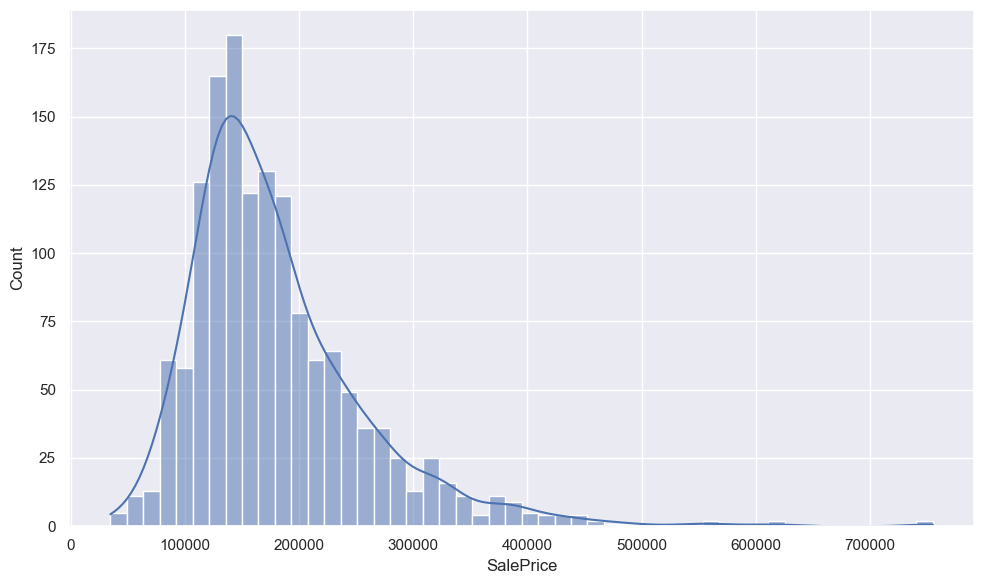

In [812]:
# THe density plot of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='SalePrice',kde=True,bins=50)
plt.tight_layout()
plt.show()

In [813]:
# The data is skewed to right with peak at around 150 - 160k and a long tail with maximum value about 800k.

In [814]:
data.SalePrice.skew()

1.8828757597682129

In [815]:
# Let's apply logarithmic function to SalePRice to make it normal
#data['SalePrice'] = np.log1p(data['SalePrice'])

In [816]:
#plt.figure(figsize=(10,4))
#sns.histplot(data=data,x='SalePrice',kde=True)
#plt.tight_layout()
#plt.show()

In [817]:
data['SalePrice'].head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

### Encoding

In [818]:
from sklearn.preprocessing import OneHotEncoder

In [819]:
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [820]:
data=pd.get_dummies(data,columns=list(categorical),drop_first=True)

In [821]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,group,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,2003.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,train,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,1976.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,train,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,2001.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,train,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,1998.0,3.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,train,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,2000.0,3.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,train,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Split data into Dependent and Independent Variables

In [822]:
train = data[data['group'] == 'train']
test = data[data['group'] == 'test'] 

In [823]:
x = train.drop(columns=['group','SalePrice'],axis=1)
y = train['SalePrice']
test = test.drop(['group','SalePrice'],axis=1)

### Feature Scaling

In [825]:
from sklearn.preprocessing import StandardScaler

In [826]:
numerical = x.select_dtypes(exclude='object').columns
x[numerical] = StandardScaler().fit_transform(x[numerical])

In [827]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

### Model Building and Evaluating

In [830]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

### OLS Method

In [831]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as slm

In [832]:
reg_model = slm.OLS(exog=x_train,endog=y_train).fit()

In [833]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     50.98
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:49:44   Log-Likelihood:                -11612.
No. Observations:                1022   AIC:                         2.367e+04
Df Residuals:                     801   BIC:                         2.476e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass            -1282.8461   4731.882     -0.271      0.786   -1.06e+04    8005.506
LotFrontage            1776.9426   1208.037      1.471      0.142    -594.349    4148.235
LotArea                8935.1225   1386.232      6.446      0.000    6214.047    1.17e+04
OverallQual            1.007e+04   1818.056      5.538      0.000    6498.925    1.36e+04
OverallCond            6552.6634   1230.671      5.324      0.000    4136.941    8968.385
YearBuilt               1.01e+04   2941.597      3.432      0.001    4321.745    1.59e+04
YearRemodAdd           1527.3011   1525.175      1.001      0.317   -1466.511    4521.113
MasVnrArea             3395.5413   1273.124      2.667      0.008     896.488    5894.594
BsmtFinSF1             6323.0411   1328.234      4.760      0.000    3715.812    8930.271
BsmtFinSF2             1495.4063   1632.839      0.916      0.360   -1709.743    4700.556
BsmtUnfSF             -1081.7691   1011.649     -1.069      0.285   -3067.566     904.028
TotalBsmtSF            6034.0431   1638.484      3.683      0.000    2817.814    9250.272
2ndFlrSF               5388.1884   3889.069      1.385      0.166   -2245.782     1.3e+04
LowQualFinSF          -1635.8455   1147.517     -1.426      0.154   -3888.342     616.651
GrLivArea              2.827e+04   3300.338      8.566      0.000    2.18e+04    3.47e+04
BsmtFullBath            632.4126   1316.115      0.481      0.631   -1951.029    3215.855
BsmtHalfBath            165.0187    955.186      0.173      0.863   -1709.945    2039.982
FullBath               1938.6130   1557.997      1.244      0.214   -1119.627    4996.853
HalfBath               -569.3116   1377.635     -0.413      0.680   -3273.513    2134.889
BedroomAbvGr          -2330.5854   1327.046     -1.756      0.079   -4935.484     274.313
KitchenAbvGr          -3069.1395   2092.808     -1.467      0.143   -7177.174    1038.895
Fireplaces             1303.2250   1082.210      1.204      0.229    -821.077    3427.527
GarageYrBlt             480.3301   1728.639      0.278      0.781   -2912.868    3873.528
GarageCars             4785.9335   1353.808      3.535      0.000    2128.503    7443.364
WoodDeckSF             2918.5522    935.502      3.120      0.002    1082.228    4754.877
OpenPorchSF             624.5193    971.817      0.643      0.521   -1283.089    2532.127
EnclosedPorch           238.3780    939.916      0.254      0.800   -1606.612    2083.368
3SsnPorch               984.7742    754.083      1.306      0.192    -495.438    2464.986
ScreenPorch            1818.4803    965.261      1.884      0.060     -76.260    3713.221
PoolArea               4063.2731   1039.273      3.910      0.000    2023.253    6103.294
MiscVal                 -22.0039    756.467     -0.029      0.977   -1506.896    1462.888
MoSold                -

In [834]:
p_value = {}
for i in x.columns.to_list():
    p_value[f'{i}'] = reg_model.pvalues[i]

- Considering only significant variables that have p-value less than 0.05

In [835]:
df = pd.DataFrame(p_value.items(),columns=['Variable','P_Value']).sort_values(by='P_Value',ascending=False).reset_index(drop=True)
df['P_Value'] = df['P_Value'].round(2)
df = df[df['P_Value']<0.05]
imp_features = df['Variable']

In [836]:
data = data[imp_features]
data.head()

,HeatingQC_TA,Neighborhood_NWAmes,BsmtExposure_No,Exterior1st_ImStucc,KitchenQual_Fa,LotConfig_CulDSac,LandSlope_Mod,Condition1_PosN,LandContour_Lvl,MSZoning_FV,Neighborhood_Edwards,Neighborhood_Mitchel,ExterQual_TA,MasVnrArea,BsmtQual_TA,BsmtExposure_Gd,Neighborhood_StoneBr,GarageCond_Fa,GarageQual_Po,GarageCond_Gd,ExterQual_Gd,GarageCond_TA,GarageCond_Po,Condition2_RRAe,Neighborhood_NoRidge,WoodDeckSF,RoofStyle_Shed,Street_Pave,GarageQual_Gd,LandSlope_Sev,YearBuilt,GarageCars,Condition1_Norm,GarageQual_TA,TotalBsmtSF,GarageQual_Fa,PoolArea,BsmtQual_Gd,BsmtFinSF1,KitchenQual_TA,OverallCond,OverallQual,LotArea,KitchenQual_Gd,Condition2_PosN,GrLivArea,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_CompShg,RoofMatl_WdShngl,HeatingQC_Po,RoofMatl_Roll,Electrical_Mix,BsmtCond_Po,Exterior2nd_CBlock,Exterior1st_CBlock,RoofMatl_Metal,Functional_Sev,RoofMatl_Membran
0,0,0,1,0,0,0,0,0,1,0,0,0,0,196.0,0,0,0,0,0,0,1,1,0,0,0,0.0,0,1,0,0,2003.0,2.0,1,1,856.0,0,0.0,1,706.0,0,5.0,7.0,8450.0,1,0,1710.0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,1,0,0,0,0,0,1,0,0,0,298.0,0,1,0,0,1976.0,2.0,0,1,1262.0,0,0.0,1,978.0,1,8.0,6.0,9600.0,0,0,1262.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,162.0,0,0,0,0,0,0,1,1,0,0,0,0.0,0,1,0,0,2001.0,2.0,1,1,920.0,0,0.0,1,486.0,0,5.0,7.0,11250.0,1,0,1786.0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0.0,1,0,0,0,0,0,0,1,0,0,0,0.0,0,1,0,0,1915.0,3.0,1,1,756.0,0,0.0,0,216.0,0,5.0,7.0,9550.0,1,0,1717.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,350.0,0,0,0,0,0,0,1,1,0,0,1,192.0,0,1,0,0,2000.0,3.0,1,1,1145.0,0,0.0,1,655.0,0,5.0,8.0,14260.0,1,0,2198.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [837]:
# Importing Regression models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [838]:
# Creating a dictionary of models and modelnames

models = {
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor(),
    "XGBRegressor":XGBRegressor()
}

In [839]:
# Initialize rmse, r2_scores, model_names lists that holds respective values
rmse=[]
r2_scores=[]
model_names=[]


for name,model in models.items():
    a = model.fit(x_train,y_train)
    
    predicted = a.predict(x_test)
    RMSE = np.sqrt(mean_squared_error(y_test,predicted))
    r2_score_ = r2_score(y_test,predicted)
    
    rmse.append(RMSE)
    r2_scores.append(r2_score_)
    model_names.append(name)

In [840]:
# Creating dataframe of RMSE, R2_Score, Model Names

df_results = pd.DataFrame([model_names,rmse,r2_scores])
df_results = df_results.transpose()
df_results = df_results.rename(columns={1:'RMSE',2:'R2_Score',0:'Model Name'}).sort_values(by='R2_Score',ascending=True)
df_results

,Model Name,RMSE,R2_Score
0,Ridge,58754.490403,0.410747
1,ElasticNet,27302.829435,0.872757
2,RandomForestRegressor,26802.385988,0.877379
3,XGBRegressor,26610.660431,0.879127


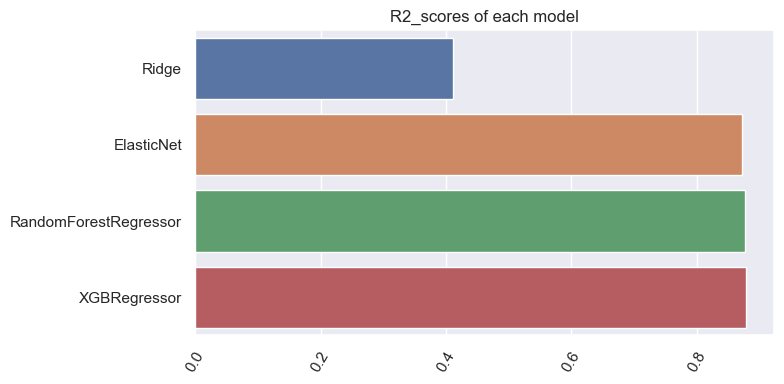

In [841]:
# Plotting bargraph with respective to model name and R2_score

plt.figure(figsize=(8,4))
sns.barplot(y=model_names,x=r2_scores)
plt.title("R2_scores of each model")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

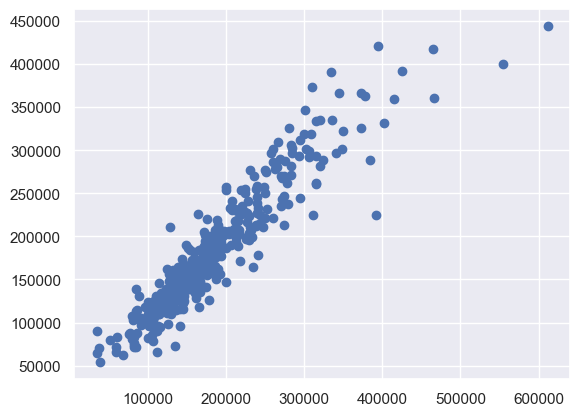

In [842]:
plt.scatter(y_test,predicted)
plt.show()

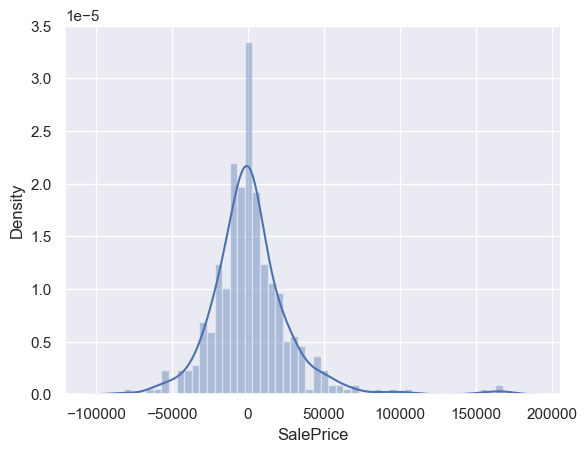

In [843]:
sns.distplot((y_test - predicted),bins=50)
plt.show()

In [846]:
## Submission

In [847]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [848]:
salePrice=xgb.predict(test)

In [850]:
salePrice

array([212846.27, 294765.16, 565762.5 , ..., 306287.1 , 273195.78,
       569917.5 ], dtype=float32)

### Submission

In [865]:
submission_df=pd.read_csv('sample_submission.csv')
submission_df['SalePrice']=salePrice
submission_df=submission_df.round(2)

In [868]:
submission_df.to_csv('finalSubmission.csv',index=False)